In [38]:
# Importando Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
)

df = pd.read_csv('/content/df_tratado.csv')

df.head()

/tmp/ipython-input-38-3394534825.py:14: DtypeWarning: Columns (4126,4127,4128,4129,4130,4131,4132,4133,4134,4135,4136,4137,4138,4139,4140,4141,4142,4143,4144,4145,4146,4147,4148,4149,4150,4151,4152,4153,4154,4155,4156,4157,4158,4159,4160,4161,4162,4163,4164,4165,4166,4167,4168,4169,4170,4171,4172,4173,4174,4175,4176,4177,4178,4179,4180,4181,4182,4183,4184,4185,4186,4187,4188,4189,4190,4191,4192,4193,4194,4195,4196,4197,4198,4199,4200,4201,4202,4203,4204,4205,4206,4207,4208,4209,4210,4211,4212,4213,4214,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224,4225,4226,4227,4228,4229,4230,4231,4232,4233,4234,4235,4236,4237,4238,4239,4240,4241,4242,4243,4244,4245,4246,4247,4248,4249,4250,4251,4252,4253,4254,4255,4256,4257,4258,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268,4269,4270,4271,4272,4273,4274,4275,4276,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286,4287,4288,4289,4290,4291,4292,4293,4294,4295,4296,4297,4298,4299,4300,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,43

,churn,customer_seniorcitizen,customer_tenure,account_charges_monthly,account_charges_total,customerid_0003-MKNFE,customerid_0004-TLHLJ,customerid_0011-IGKFF,customerid_0013-EXCHZ,customerid_0013-MHZWF,...,internet_streamingtv_No internet service,internet_streamingtv_Yes,internet_streamingmovies_No internet service,internet_streamingmovies_Yes,account_contract_One year,account_contract_Two year,account_paperlessbilling_Yes,account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,0.0,0,9,65.6,593.30,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,True
1,0.0,0,9,59.9,542.40,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,1.0,0,4,73.9,280.85,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1.0,1,13,98.0,1237.85,False,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
4,1.0,1,3,83.9,267.40,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True


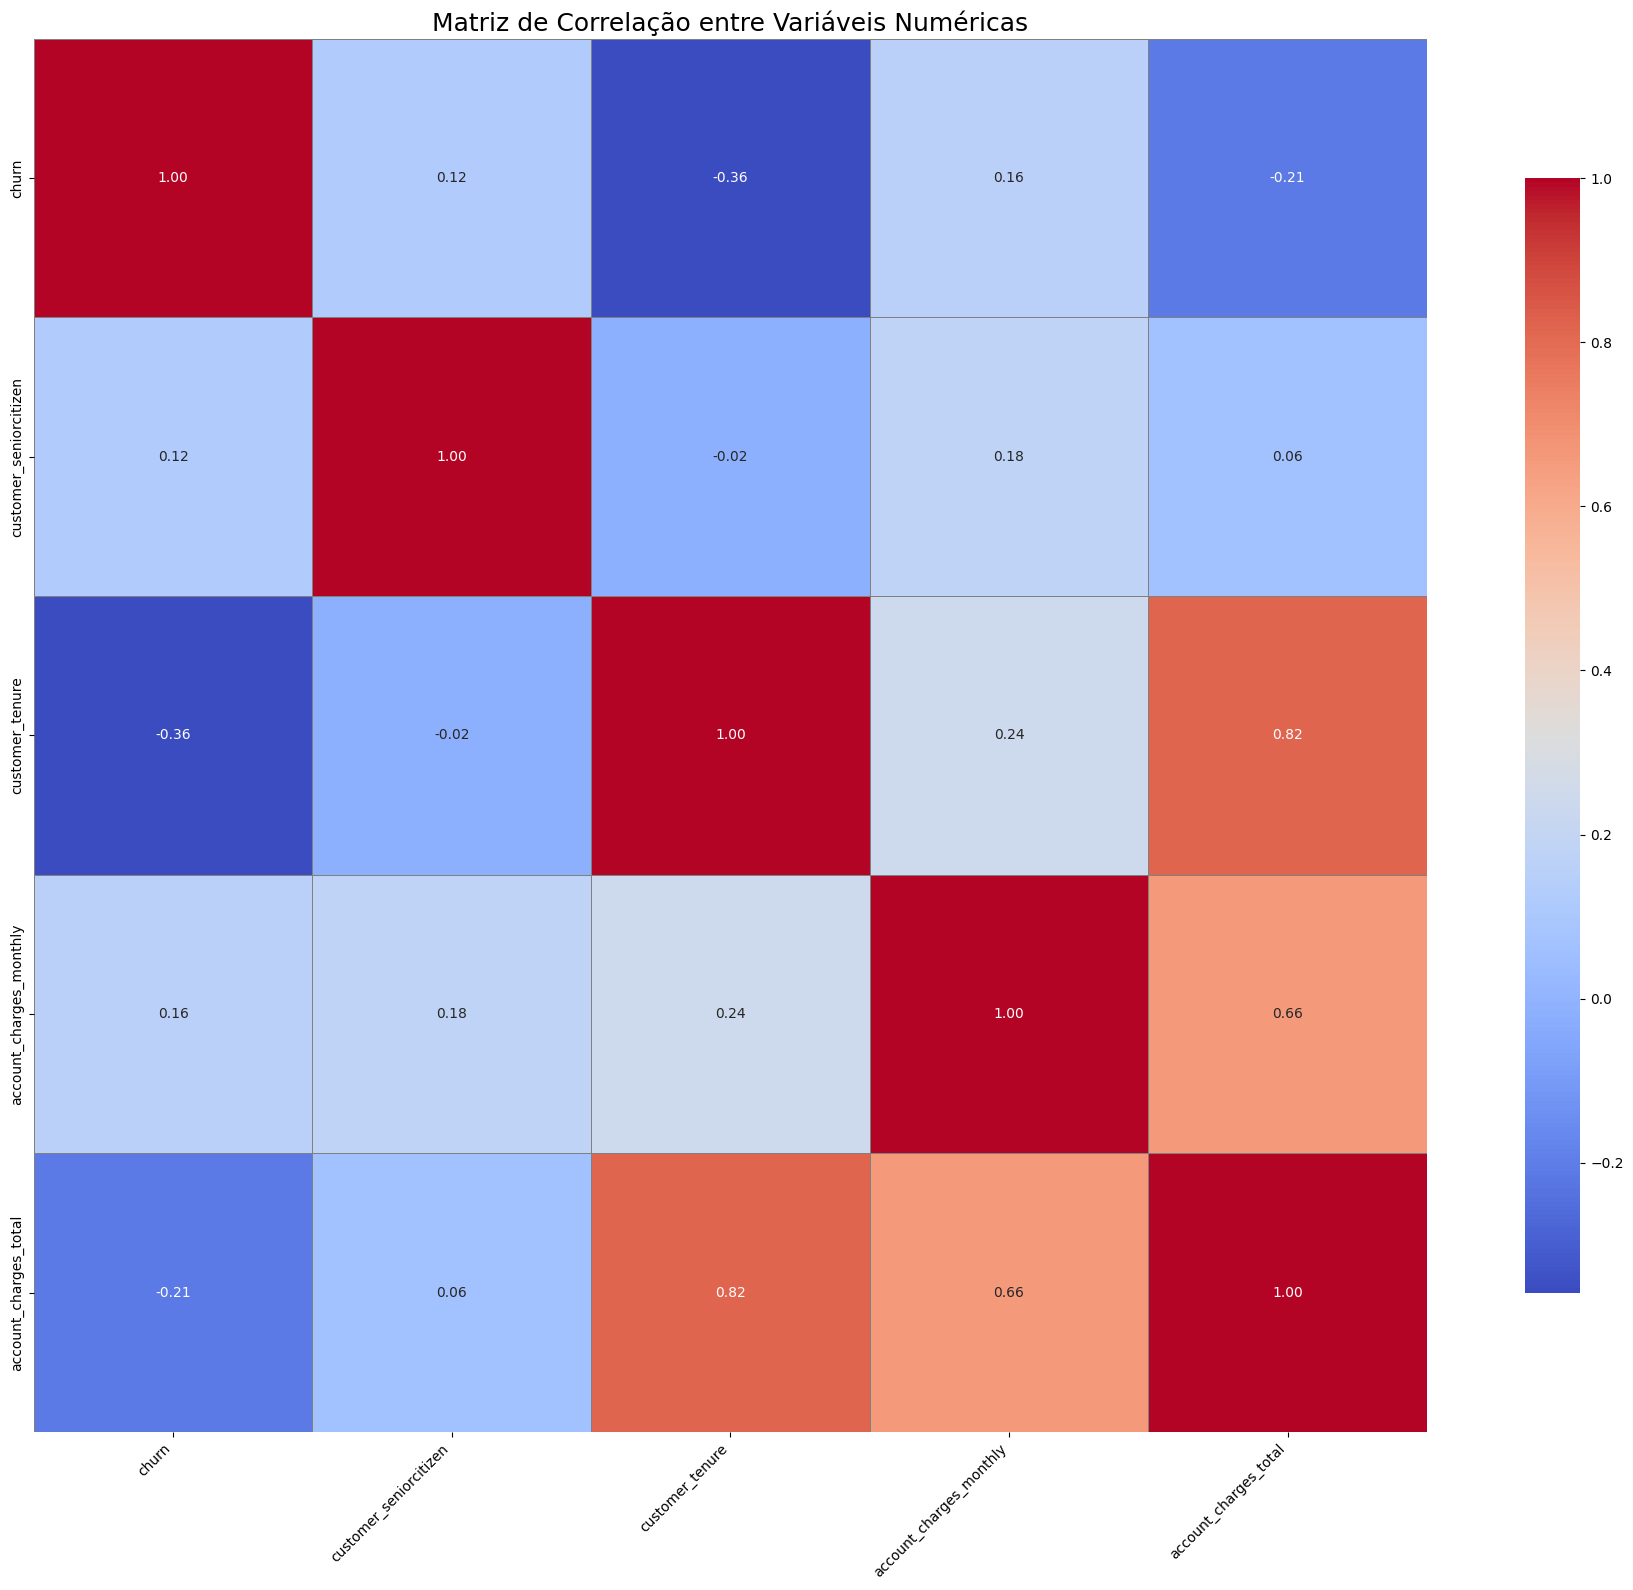

Correlação com churn:
churn                      1.000000
account_charges_monthly    0.158735
customer_seniorcitizen     0.121020
account_charges_total     -0.211813
customer_tenure           -0.358356
Name: churn, dtype: float64


In [39]:
# 2. Preparar o dataframe para matriz de correlação
df_corr = df.drop(columns=[col for col in df.columns if 'customerid' in col.lower()])

# 3. Plotar a matriz de correlação com melhorias visuais
plt.figure(figsize=(20,16))
sns.heatmap(
    df_corr.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'shrink': 0.8},
    square=True
)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



# 4. Correlação com churn ordenada
churn_corr = df_corr.corr(numeric_only=True)['churn'].sort_values(ascending=False)
print('Correlação com churn:')
print(churn_corr)


R²: 0.0415
Coeficiente: -0.0000
Intercepto: 0.3646


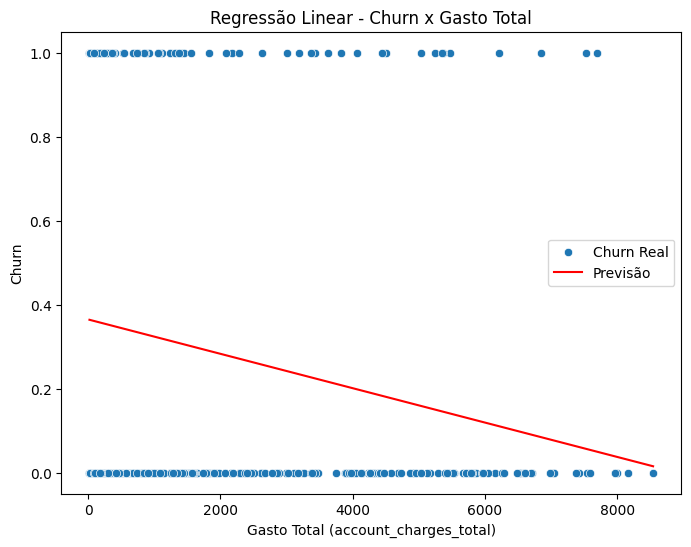

In [43]:
 # 5. Regressão Linear simples com 'account_charges_total' para prever 'churn'

X = df[['account_charges_total']]
y = df['churn']

# Remover linhas com valores nulos
data = pd.concat([X, y], axis=1).dropna()
X_clean = data[['account_charges_total']]
y_clean = data['churn']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

# Treinar modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Previsão e avaliação
y_pred = reg.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"Coeficiente: {reg.coef_[0]:.4f}")
print(f"Intercepto: {reg.intercept_:.4f}")

# Visualizar regressão
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, label='Churn Real')
sns.lineplot(x=X_test.values.flatten(), y=y_pred, color='red', label='Previsão')
plt.xlabel('Gasto Total (account_charges_total)')
plt.ylabel('Churn')
plt.title('Regressão Linear - Churn x Gasto Total')
plt.legend()
plt.show()




In [44]:
# 6.Regressão Linear para investigar impacto

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Exibindo os coeficientes
for col, coef in zip(X.columns, lin_reg.coef_):
    print(f"{col}: {coef:.4f}")



account_charges_total: -0.0000


In [26]:
# 7. Treina novamente com as features corretas
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# 8. Inicializar e treinar modelos preditivos
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_logreg.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred_logreg = model_logreg.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

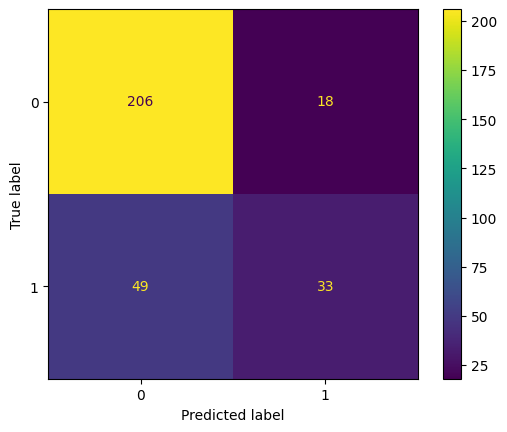

In [40]:
# 9.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot()

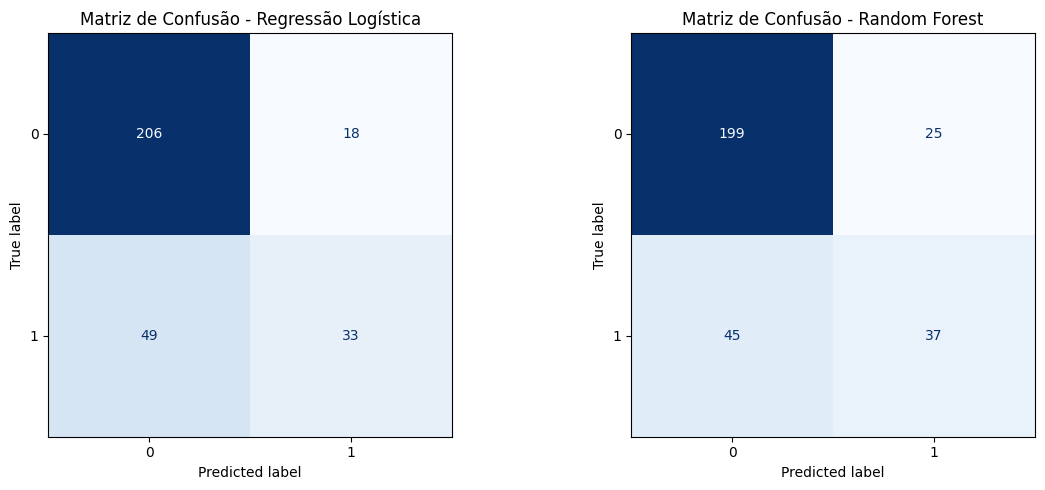

In [30]:
# 10. Plotar matrizes de confusão lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm_logreg).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Matriz de Confusão - Regressão Logística')

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('Matriz de Confusão - Random Forest')

plt.tight_layout()
plt.show()

In [31]:
# 11. Relatórios de classificação detalhados
print("Relatório de Classificação - Regressão Logística")
print(classification_report(y_test, y_pred_logreg))

print("Relatório de Classificação - Random Forest")
print(classification_report(y_test, y_pred_rf))



Relatório de Classificação - Regressão Logística
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       224
         1.0       0.65      0.40      0.50        82

    accuracy                           0.78       306
   macro avg       0.73      0.66      0.68       306
weighted avg       0.76      0.78      0.76       306

Relatório de Classificação - Random Forest
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       224
         1.0       0.60      0.45      0.51        82

    accuracy                           0.77       306
   macro avg       0.71      0.67      0.68       306
weighted avg       0.76      0.77      0.76       306



--- Métricas para Regressão Logística ---
Acurácia: 0.7810
Precisão: 0.6471
Recall: 0.4024
F1-Score: 0.4962

Relatório de Classificação - Regressão Logística
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       224
         1.0       0.65      0.40      0.50        82

    accuracy                           0.78       306
   macro avg       0.73      0.66      0.68       306
weighted avg       0.76      0.78      0.76       306

--- Métricas para Random Forest ---
Acurácia: 0.7712
Precisão: 0.5968
Recall: 0.4512
F1-Score: 0.5139

Relatório de Classificação - Random Forest
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       224
         1.0       0.60      0.45      0.51        82

    accuracy                           0.77       306
   macro avg       0.71      0.67      0.68       306
weighted avg       0.76      0.77      0.76       306



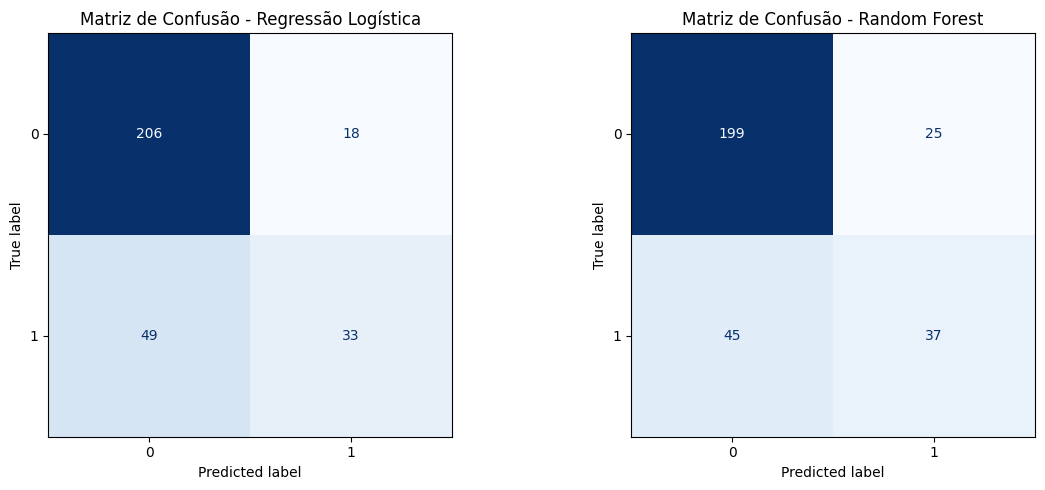

In [32]:
# 12. Avaliação e comparação dos modelos

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

def print_metrics(y_true, y_pred, model_name):
    print(f"--- Métricas para {model_name} ---")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print()

# Avaliar Regressão Logística
print_metrics(y_test, y_pred_logreg, 'Regressão Logística')
print("Relatório de Classificação - Regressão Logística")
print(classification_report(y_test, y_pred_logreg))

# Avaliar Random Forest
print_metrics(y_test, y_pred_rf, 'Random Forest')
print("Relatório de Classificação - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Plotar matrizes de confusão
fig, axes = plt.subplots(1, 2, figsize=(12,5))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm_logreg).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Matriz de Confusão - Regressão Logística')

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('Matriz de Confusão - Random Forest')

plt.tight_layout()
plt.show()



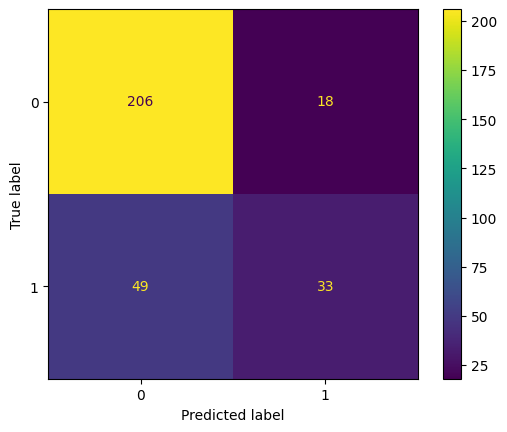

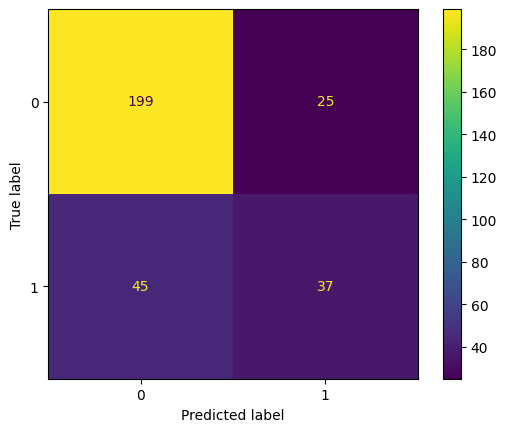

In [47]:
#13. Matrizes de confusão
cm_log = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm_log).plot()

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()

plt.show()

Relatório de Classificação - Regressão Logística
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       224
         1.0       0.65      0.40      0.50        82

    accuracy                           0.78       306
   macro avg       0.73      0.66      0.68       306
weighted avg       0.76      0.78      0.76       306

Relatório de Classificação - Random Forest
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       224
         1.0       0.60      0.45      0.51        82

    accuracy                           0.77       306
   macro avg       0.71      0.67      0.68       306
weighted avg       0.76      0.77      0.76       306



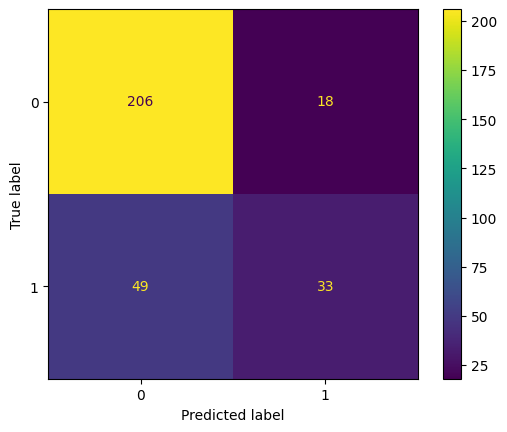

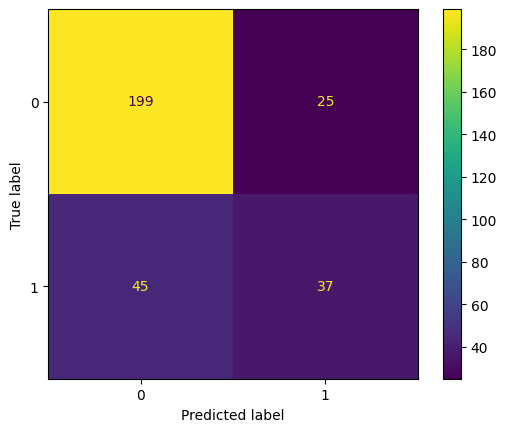

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Treinar Regressão Logística
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Relatório de Classificação - Regressão Logística")
print(classification_report(y_test, y_pred_log))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log)).plot()

# Treinar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Relatório de Classificação - Random Forest")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()


Variáveis selecionadas: ['account_charges_monthly', 'customer_seniorcitizen', 'account_charges_total', 'customer_tenure']


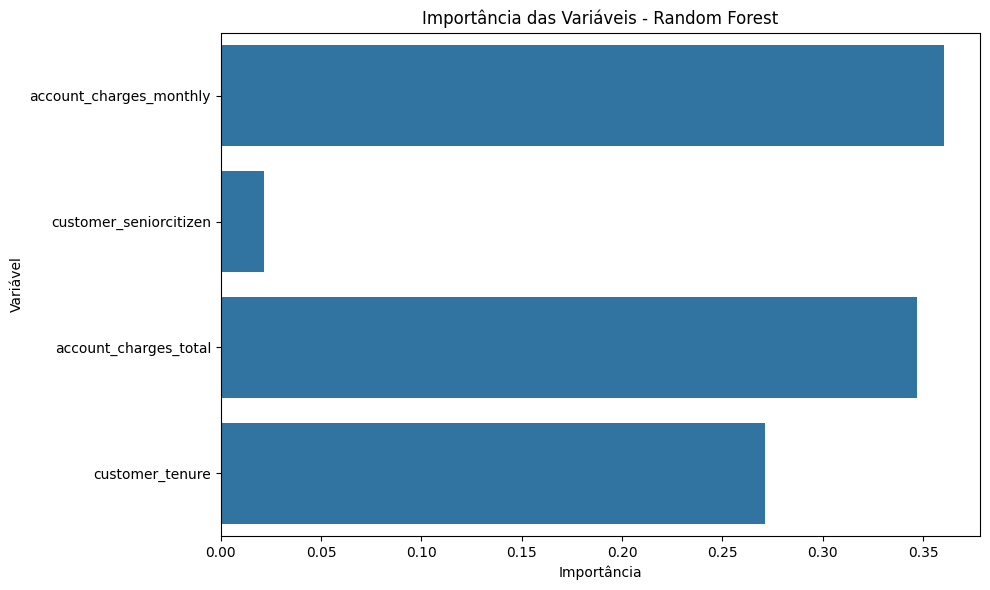

In [42]:
 # 14.Impotância das Variáveis no Random Forest

# Garante que a correlação seja calculada apenas com colunas numéricas
churn_corr = df.corr(numeric_only=True)['churn'].sort_values(ascending=False)

# Seleciona variáveis com correlação significativa (exemplo: > 0.1 ou < -0.1)
selected_features = churn_corr[abs(churn_corr) > 0.1].index.drop('churn').tolist()

print("Variáveis selecionadas:", selected_features)


importances = model_rf.feature_importances_
features = selected_features

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


In [36]:
df.to_csv('df_tratado.csv', index=False)